<h1>Problem Set 4</h1> 
<h3><center>Optimal policy</center></h3>

<center>Pau Belda-i-Tortosa</center>,


<center>October 2018</center>

<h3>Question 1: Simulation of the Timmerman's 1993 model.</h3>

The model aims to explain two empirical facts: 

(1) The huge volatility in the stocks prices.

(2) The predictability of the stocks prices given the dividends realizations. 

The basic hypothesis is that agents know the form of the dividend process but do not know the true value of the parameters. They estimate them by standard optimal recursive formulas. Then, following Timmerman's exposition, we can write the model as follows:

(1) Dividends dgp: $ln D_t - ln D_{t-1} = \mu + \epsilon_t$ 

where $\epsilon$ follows an iid process, following a normal distribution (0, $\sigma^2$).

(2) Learning process:
     
 (2.1) $\hat{\mu_t} = \frac{n-1}{n}\hat{\mu_{t-1}} + \frac{\Delta ln D_t}{n}$
 
 (2.2) $\hat{\sigma_t^2}=\frac{n-1}{n^2}\big[n \hat{\sigma_{t-1}^2} + (\hat{\mu_{t-1}} - \Delta ln D_t)^2\big]$
 
(3) Present value of stock price:
    $P_t = D_t \frac{e^ {\big(\widetilde{\mu}_t+\widetilde{\sigma}_t^2/2\big)}}{1+r - e^ {\big(\widetilde{\mu}_t+\widetilde{\sigma}_t^2/2\big)} }$

where 
$\widetilde{\mu}_t=\hat{\mu_t}$ and $\widetilde{\sigma}_t^2=\hat{\sigma_t^2}$ 

if 
$\hat{\mu_t}+\hat{\sigma_t^2} < ln(1+r)$


and 


$\widetilde{\mu}_t=\hat{\mu_{t-1}}$ and $\widetilde{\sigma}_t^2=\hat{\sigma_{t-1}}^2$ 

if
$\hat\mu_t+\hat{\sigma_t^2} < ln(1+r)$

This conditions (one may call them "projection facilities") ensure that the PD ratio does not take negative values. 

Then, for simulating the model, the algorithm works as follows:

- simulate the exogenous dividends process
- make a guess for the initial value of $\mu$ and $\sigma^2$ and update it by correcting the prediction error (following an OLS learning)
- use the perceived parameters values in the price equation to get a process for the PD ratio.  

Now, we make a two-step exercise. First, we simulate the model once (over a horizon of 500 periods), setting the parameters to match the facts reported in AMN(2016). After that, we run a Montecarlo experiment 1000 times, to see how the robustness of this findings. 

** One-time simulation**

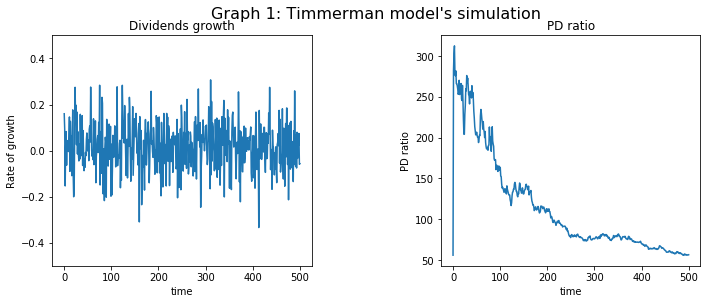

Text(0.5,1,'Graph 2: Distribution of PD ratio')

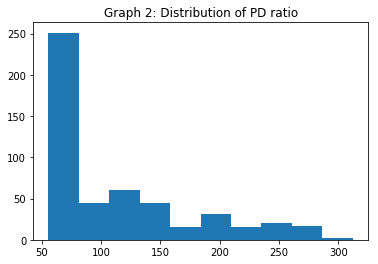

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

np.random.seed( 10 )
random.seed(10)

#Set the parameter values: 
mu=0.015
std=0.33
r=0.05
n=500


#True dgp for dividends:
eps=np.random.normal(0,pow(std,2),n)
DG=np.ones((n))
for t in range(n):
    DG[t]=mu + eps[t]

#Learning:
mu_hat=np.ones((n))
mu_hat[0]=0.034
for t in range(0, n-1):
    mu_hat[t+1]= (((n-1)/n)*mu_hat[t]) + (DG[t]/n)

var_hat=np.ones((n))
var_hat[0]=pow(0.15,2)
for t in range(0,n-1):
    var_hat[t+1]= ((n-1)/pow(n,2))*((n*var_hat[t]) + pow(mu_hat[t] - DG[t],2))

#Prices generating proces: 
PD=np.ones((n))
for t in range(n):
    if mu_hat[t]+var_hat[t]<np.log10(1+r):
        PD[t]= np.exp(mu_hat[t]+(var_hat[t]/2))/(1+r - np.exp(mu_hat[t]+(var_hat[t]/2)))
    else:
        PD[t]= np.exp(mu_hat[t-1]+(var_hat[t-1]/2))/(1+r - np.exp(mu_hat[t-1]+(var_hat[t-1]/2)))

#Return 
r=np.empty((n))
r[0]= 0.05
for t in range(1,n):
    r[t]=((PD[t]+1)/(PD[t-1]))*DG[t]


#PLOT
time=np.linspace(0,n,n)
plt.figure
plt.suptitle("Graph 1: Timmerman model's simulation", x=0.75, y=1, fontsize=16)
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.5)


plt.subplot(121)
plt.plot(time,DG,)
#plt.plot(time,a, label= 'Perceived dgp')
#plt.legend()
plt.title('Dividends growth')
plt.ylim([-0.5,0.5])
plt.xlabel('time')
plt.ylabel('Rate of growth')

plt.subplot(122)
plt.plot(time,PD, label= 'PD ratio')
plt.title('PD ratio')
plt.xlabel('time')
plt.ylabel('PD ratio')
plt.show()

plt.hist(PD)
plt.title('Graph 2: Distribution of PD ratio')
        

Graph 1 plots the dividends exogenous stochastic process and the evolution of the PD ratio. Graph 2 pot the distribution of the PD ratio. At first sight, it looks like the model generates high volatility of the PD ratio. Let's check it out by reporting **descriptive statistics.**

In [15]:
#Report statistics
E_PD= np.mean(PD)
ST_PD=np.std(PD)
CV_PD=ST_PD/E_PD
AC_PD=pd.Series(PD).autocorr()
E_DG= np.mean(DG)
ST_DG= np.std(DG)
CV_DG=ST_DG/E_DG
E_r=np.mean(r)
ST_r=np.std(r)

#Print them
print('Expectation of PD ratio:', "{0:.2f}".format(E_PD))
print('Volatility of PD ratio:',"{0:.2f}".format(ST_PD))
print('Relative volatility OF PD ratio:', "{0:.2f}".format(CV_PD))
print('Persistence of PD ratio:', "{0:.2f}".format(AC_PD))
print('Expectation of DG:', "{0:.2f}".format(E_DG))
print('Volatility of DG:', "{0:.2f}".format(ST_DG))
print('Relative volatility of DG:', "{0:.2f}".format(CV_DG))
print('Expectation of r:', "{0:.2f}".format(E_r))
print('Volatility of r:', "{0:.2f}".format(ST_r))

Expectation of PD ratio: 114.66
Volatility of PD ratio: 60.64
Relative volatility OF PD ratio: 0.53
Persistence of PD ratio: 0.98
Expectation of DG: 0.02
Volatility of DG: 0.10
Relative volatility of DG: 5.60
Expectation of r: 0.02
Volatility of r: 0.11


**Results**: With a particular set of parameter values, none of them specially unreasonable (note that the coefficient of variation of the dividends process is 5.6 here vs around 7 in AMN table's fact, which means that we create a process with less volatility than the actual one!), we are able to match:

- Fact 1: Volatility of the PD ratio. Note that the coefficient of variation is 0.53 and it is vs 0.5 in AMN paper. 
- Fact 2: Persistence of the PD ratio. We get 0.98 vs. 0.97 in AMN table. 
- Fact 3: we get a return standard deviation of 0.14 (over a mean of 0.02). AMN table report a std of 11.44, which probably is obtained using rate in %. Then, our simulation is not far from that figure. 

Now, let's do a Montercarlo simulation to check the robustness of our findings.

**Montecarlo simulation**

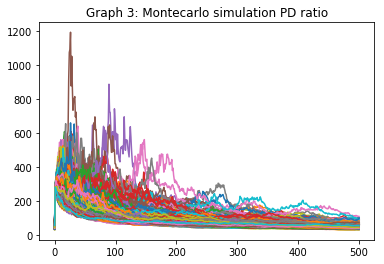

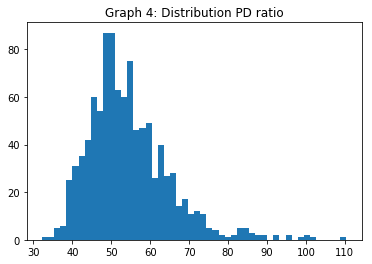

In [16]:
#1000 times Montecarlo experiment
np.random.seed( 10 )
random.seed(10)

#Set the parameter values: 
mu=0.015
std=0.33
r=0.05
n=500
time=np.linspace(0,n,n)
result=[]
rates=[]
for i in range(1000):
    eps=np.random.normal(0,pow(std,2),n)
    DG=np.ones((n))
    for t in range(n):
        DG[t]=mu + eps[t]
        
    mu_hat=np.ones((n))
    mu_hat[0]=0.034
    for t in range(0, n-1):
        mu_hat[t+1]= (((n-1)/n)*mu_hat[t]) + (DG[t]/n)

    var_hat=np.ones((n))
    var_hat[0]=pow(0.15,2)
    for t in range(0,n-1):
        var_hat[t+1]= ((n-1)/pow(n,2))*((n*var_hat[t]) + pow(mu_hat[t] - DG[t],2))

    #Prices generating proces: 
    PD=np.ones((n))
    for t in range(n):
        if mu_hat[t]+var_hat[t]<np.log10(1+r):
            PD[t]= np.exp(mu_hat[t]+(var_hat[t]/2))/(1+r - np.exp(mu_hat[t]+(var_hat[t]/2)))
        else:
            PD[t]= np.exp(mu_hat[t-1]+(var_hat[t-1]/2))/(1+r - np.exp(mu_hat[t-1]+(var_hat[t-1]/2)))

    #Return 
    rate=np.empty((n))
    rate[0]= 0.05
    for t in range(1,n):
        rate[t]=((PD[t]+1)/(PD[t-1]))*DG[t]
    plt.plot(time,PD)
    result.append(PD[-2]) #Append the ending value of each simulation. 
    rates.append(rate[-2])

#PLOT
plt.title('Graph 3: Montecarlo simulation PD ratio')
plt.show()
#create histogram of ending stock values for our multiple simulations
plt.hist(result,bins=50)
plt.title('Graph 4: Distribution PD ratio')
plt.show()    

Let's report the statistics.

In [17]:
E_PD= np.mean(result)
ST_PD=np.std(result)
CV_PD=ST_PD/E_PD
AC_PD=pd.Series(result).autocorr()
E_DG= np.mean(DG)
ST_DG= np.std(DG)
CV_DG=ST_DG/E_DG
E_r=np.mean(rates)
ST_r=np.std(rates)


print('Expectation of PD ratio:', "{0:.2f}".format(E_PD))
print('Volatility of PD ratio:',"{0:.2f}".format(ST_PD))
print('Relative volatility OF PD ratio:', "{0:.2f}".format(CV_PD))
print('Persistence of PD ratio:', "{0:.2f}".format(AC_PD))
print('Expectation of DG:', "{0:.2f}".format(E_DG))
print('Volatility of DG:', "{0:.2f}".format(ST_DG))
print('Relative volatility of DG:', "{0:.2f}".format(CV_DG))
print('Expectation of r:', "{0:.2f}".format(E_r))
print('Volatility of r:', "{0:.2f}".format(ST_r))

Expectation of PD ratio: 54.41
Volatility of PD ratio: 10.41
Relative volatility OF PD ratio: 0.19
Persistence of PD ratio: -0.03
Expectation of DG: 0.02
Volatility of DG: 0.10
Relative volatility of DG: 6.10
Expectation of r: 0.01
Volatility of r: 0.11


The results of the Montecarlo simulation are less succesful:

- The volatility of the PD is much lower than it should. 
- The persistence of the PD is negative and very low. 
- The only fact that seems working is the volatility of the returns. 

In a sense, this less triomphal results are natural: we are running the model for 500 periods 1000 times. So, the parameters should converge to the true ones (that's why, for instance, we do not observe persistence). 

All in all, the message of the Timmerman model is that it works quite well for replating some of the stylized facts, but we need something else for a good accountancy. 

<h3>Question 2: Simulation of the AMN's 2016 model.</h3>

Model of stock price growth learning. Notice that Timmerman's model was about dividend growth learning. 

The model boils down to 7 equations:

- Dividends exogenous dgp:


(1) $\frac{D_t}{D_{t-1}}=a\epsilon_t$, 
where $\epsilon$ follows a lognormal ($-s^2/2$, $s^2$). 

- Price growth process:

(2) $\frac{P_t}{P_{t-1}}=\big(1 + \frac{\delta \Delta \beta_t}{1 - \delta \beta_t}\big)a \epsilon_t$


- Learning process (agents make beliefs about the price growth): 

(3)  $\beta_t= \beta_{t-1} + \frac{1}{\alpha_t}\big(\big(\frac{D_{t}}{D_{t-1}}\big)^{-\sigma}\frac{P_t}{P_{t-1}}- \beta{t-1}\big)$

where $\sigma$ is capturing the risk aversion, and $\alpha_t =\alpha_{t-1}+1$, starting from $\frac{1}{\alpha_1}=0.02$. 

The algorithm works as follows (self referential process: actual price growth determine perceived price and the other way around): 

- Given $\beta_0$ and $\beta_1$, using (2) we get $\frac{P_1}{P_0}$.
- With $\frac{P_1}{P_0}$ using (3) we get $\beta_2$. 
- With $\beta_2$ (we have also $\beta_1$), using (2) we get $\frac{P_2}{P_1}$. And so on.

With these variables, we can get the PD ratio and the returns process like this (given an initial value for the PD ratio):

- PD ratio:

(4) $\frac{P_t}{D_t}= \frac{\delta \beta^{RE}}{1- \delta \beta_t}$

where $\beta^{RE} = E_t \big(\frac {D_t^{\sigma}}{D_{t+1}^{\sigma}}\frac{D_{t+1}}{D_t}\big) = a^{1-\sigma} e^{\sigma(1-\sigma)s^2/2}$.In other words,  $\beta^{RE}$ is the RE expectation of the dividends growth adjusted by the stochastic discount factor. Notice that agents are learning about prices, that is, $\beta_t= \tilde{E_t} \big(\frac {D_t^{\sigma}}{D_{t+1}^{\sigma}}\frac{P_{t+1}}{P_t}\big)$ 

In the RE version,the price growth should mimic the dividends growth process and then, $\beta_t = \beta^{RE}$. 

- Stock return:

(5) $r_t^s= \frac{\frac{P_t}{D_t}+1}{\frac{P_{t-1}}{D_{t-1}}}\frac{D_t}{D_{t-1}}-1$

- Bonds (i.e. riskless asset) return: 

 $\frac{1}{1+r^b}= \delta E_t \big(\frac {D_t^{\sigma}}{D_{t+1}^{\sigma}}\big)^{-\sigma} = \delta a^{-\sigma}e^{\sigma (1+\sigma)s^2/2} \equiv \delta \beta^R$
 
then,

(6) $r^b = (\delta \beta^R)^{-1} - 1$

- Excess return:

(7) $x_t = r_t - r_t^b$

With all these ingredients let's proceed as before. First, we run a single simulation of the model. After that, we will do a Montecarlo experiment.

**One-time simulation**

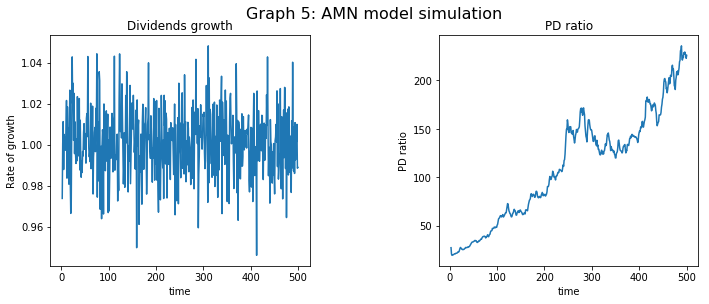

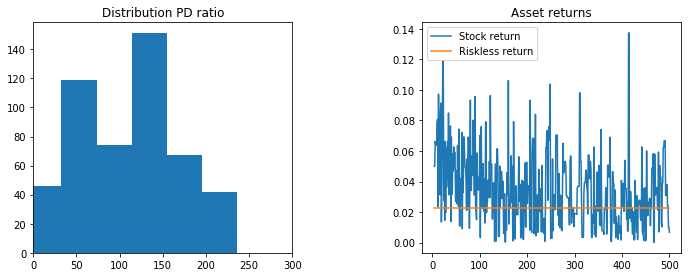

In [40]:
#RISK AVERSION

import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

np.random.seed( 10 )
random.seed(10)

#Parameters
delta=0.999
sigma=5
a=1.001
s=0.033
U_PD=500
n=500

#True dgp for dividends:
eps=np.random.lognormal(-pow(s,2)/2,pow(4*s,2),n) #Artificially increse shocks variance.  
DG=np.ones((n))
for t in range(1,n):
    DG[t]=a*eps[t]


#Price process learning: 
alpha=np.zeros((n))
alpha[2]=1/0.015
for t in range(3,n):
    alpha[t]=alpha[t-1]+1

#Special beta's
beta_RE=pow(a,1-sigma)*np.exp(-sigma*(1-sigma)*(s**2)/2)
beta_R=pow(a,-sigma)*np.exp(-sigma*(1+sigma)*(s**2)/2)

#Bounds for beta
beta_U = (1/delta) - (beta_RE/U_PD)
beta_L= pow(delta,-1) - 2*(pow(delta,-1) - beta_U)

# Weighting function for the projection facilities
def w(x):
    return 1- (beta_U - beta_L)/(x+beta_U-beta_L)

# Storage objects
beta=np.empty((n)) #vector to store beta's
beta[0]=beta_RE #we need two starting values for beta, to get the first price growth ratio. 
beta[1]=beta_RE
PG=np.empty((n)) #vector to store the rate of growth of prices
beta_pre=np.empty((n))

#Self referential process:
for t in range(1,n-1):
    PG[t]=(1 + (delta*(beta[t]-beta[t-1]))/(1-(delta*beta[t])))*a*eps[t]
    beta_pre[t+1]=beta[t]+((1/alpha[t+1])*((pow(DG[t],-sigma)*PG[t])-beta[t]))
    if beta_pre[t+1]<=beta_L: #Projection facilities
        beta[t+1]=beta_pre[t+1]      
    else: 
        beta[t+1]=beta_L + (w(beta_RE)*(beta_pre[t]-beta_L)*(beta_U - beta_L))

#PD ratio:
PD=np.empty((n))
for t in range(1,n):
    PD[t]=delta*beta_RE/(1-(delta*beta[t]))
    
#Returns process: 
r=np.empty((n))
r[0]= 0.05
r[1]=0.05
r[2]=0.05
for t in range(1,n):
    r[t]=((PD[t]+1)/(PD[t-1]))*DG[t]-1
    if r[t]<0:
        r[t]=r[t-1]

#Riskless return: 
r_b=np.empty((n))
r_b[0]= 0.05
r_b[1]=0.05
for t in range(1,n):
    r_b[t]=pow(delta*beta_R,-1)-1

#Excess return
x=np.empty((n))
for t in range(n):
    x[t]=r[t]-r_b[t]

#PLOT
time=np.linspace(0,n,n)
plt.figure
plt.suptitle("Graph 5: AMN model simulation", x=0.75, y=1, fontsize=16)
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.5)


plt.subplot(121)
plt.plot(time[2:500],DG[2:500],)
#plt.plot(time,a, label= 'Perceived dgp')
#plt.legend()
plt.title('Dividends growth')
#plt.ylim([-0.5,0.5])
plt.xlabel('time')
plt.ylabel('Rate of growth')

plt.subplot(122)
plt.plot(time[3:500],PD[3:500], label= 'PD ratio')
plt.title('PD ratio')
plt.xlabel('time')
plt.ylabel('PD ratio')
plt.show()

plt.figure()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.5)

plt.subplot(121)
plt.hist(PD)
plt.title('Distribution PD ratio')
plt.xlim([0,300])

plt.subplot(122)
plt.plot(time[4:500],r[4:500], label='Stock return')
plt.plot(time[3:500],r_b[3:500], label='Riskless return')
plt.title('Asset returns')
plt.legend()
plt.show()

In [41]:
#Report statistics
E_PD= np.mean(PD)
ST_PD=np.std(PD)
CV_PD=ST_PD/E_PD
AC_PD=pd.Series(PD).autocorr()
E_DG= np.mean(DG)
ST_DG= np.std(DG)
CV_DG=ST_DG/E_DG
E_r=np.mean(r)
ST_r=np.std(r)
AC_r=pd.Series(r).autocorr()
EP=np.mean(r)
B=np.mean(r_b)
EPR=EP/B

#Predictability excess return
cov=np.cov(x,PD)[0,1]
c= cov/np.var(PD)

#Print
print('Expectation of PD ratio:', "{0:.2f}".format(E_PD))
print('Volatility of PD ratio:',"{0:.2f}".format(ST_PD))
print('Relative volatility OF PD ratio:', "{0:.2f}".format(CV_PD))
print('Persistence of PD ratio:', "{0:.2f}".format(AC_PD))
print('Expectation of DG:', "{0:.2f}".format(E_DG))
print('Volatility of DG:', "{0:.2f}".format(ST_DG))
print('Relative volatility of DG:', "{0:.2f}".format(CV_DG))
print('Expectation of r:', "{0:.2f}".format(E_r))
print('Volatility of r:', "{0:.2f}".format(ST_r))
print('Persistence of stock returns:', "{0:.2f}".format(AC_r))
print('Excess return predictability:', "{0:.4f}".format(c))
print('Expectation of stock return:', "{0:.2f}".format(EP))
print('Expectation of bond return:', "{0:.2f}".format(B))
print('Equity premium ratio:', "{0:.2f}".format(EPR))

Expectation of PD ratio: 110.36
Volatility of PD ratio: 58.28
Relative volatility OF PD ratio: 0.53
Persistence of PD ratio: 0.95
Expectation of DG: 1.00
Volatility of DG: 0.02
Relative volatility of DG: 0.02
Expectation of r: 0.03
Volatility of r: 0.02
Persistence of stock returns: 0.32
Excess return predictability: -0.0001
Expectation of stock return: 0.03
Expectation of bond return: 0.02
Equity premium ratio: 1.52


This single simulation match the stylized facts quite well:

- Fact 1: We get relative volatility of the PD ratio equal to 0.53 vs 0.5 reported in the table. Then, we succeed getting a right amount of PD volatility. 

- Fact 2: We get an autocorrelation of the PD ratio equal to 0.95, while the real data serie shows a 0.97 autocorrelation. This is a good approximation. 

- Fact 3: We get a highly volatile stock return. In equivalent units, we get 0.2 vs 0.11 in the real data. Maybe our model generates too much volatile stock return. 

- Fact 4: We get a negative coefficient of the PD ratio as a regressor of the excess return. This coefficient is quite small (it is so in real data). We reply quite well this fact. 

- Fact 5: We get an equity premium ratio of 1.54 vs. 15 in real data. So, the equity premium is too small. 

- Fact 6: The autocorrelation of stock returns is 0.1 in real data but we get 0.32.

All in all, **the model succeed in explaining the volatility and persistence of the PD ratio, the volatility of the stock return and the predictability of the excess return. However, it failed in getting a high enough equity premium and in getting a moderate autocorrelation of the stock returns**. Now, let's check the robustness of these results by doing a Montecarlo simulation.

**Montercarlo simulation**

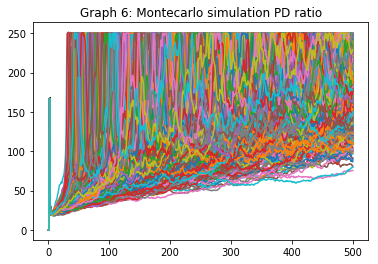

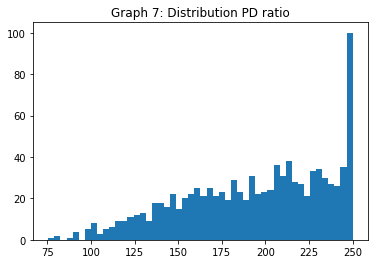

In [91]:
np.random.seed( 10 )
random.seed(10)

#Parameters
delta=0.999
sigma=5
a=1.001
s=0.033
U_PD=500
n=500
time=np.linspace(0,n,n)
result=[]
rate=[]
excess=[]
bond=[]

#Montecarlo experiment: 1000 simulations. 
for i in range(1000):
    #True dgp for dividends:
    eps=np.random.lognormal(-pow(s,2)/2,pow(4*s,2),n) #Artificially increse shocks variance.  
    DG=np.ones((n))
    for t in range(1,n):
        DG[t]=a*eps[t]


    #Price process learning: 
    alpha=np.zeros((n))
    alpha[2]=1/0.015
    for t in range(3,n):
        alpha[t]=alpha[t-1]+1

    #Special beta's
    beta_RE=pow(a,1-sigma)*np.exp(-sigma*(1-sigma)*(s**2)/2)
    beta_R=pow(a,-sigma)*np.exp(-sigma*(1+sigma)*(s**2)/2)

    #Bounds for beta
    beta_U = (1/delta) - (beta_RE/U_PD)
    beta_L= pow(delta,-1) - 2*(pow(delta,-1) - beta_U)

    # Weighting function for the projection facilities
    def w(x):
        return 1- (beta_U - beta_L)/(x+beta_U-beta_L)

    # Storage objects
    beta=np.empty((n)) #vector to store beta's
    beta[0]=beta_RE #we need two starting values for beta, to get the first price growth ratio. 
    beta[1]=beta_RE
    PG=np.empty((n)) #vector to store the rate of growth of prices
    beta_pre=np.empty((n))

    #Self referential process:
    for t in range(1,n-1):
        PG[t]=(1 + (delta*(beta[t]-beta[t-1]))/(1-(delta*beta[t])))*a*eps[t]
        beta_pre[t+1]=beta[t]+((1/alpha[t+1])*((pow(DG[t],-sigma)*PG[t])-beta[t]))
        if beta_pre[t+1]<=beta_L: #Projection facilities
            beta[t+1]=beta_pre[t+1]      
        else: 
            beta[t+1]=beta_L + (w(beta_RE)*(beta_pre[t]-beta_L)*(beta_U - beta_L))

    #PD ratio:
    PD=np.empty((n))
    for t in range(1,n):
        PD[t]=delta*beta_RE/(1-(delta*beta[t]))
        if PD[t]<0:
            PD[t]=PD[t-1]

    #Returns process: 
    r=np.empty((n))
    r[0]= 0.05
    r[1]=0.05
    r[2]=0.05
    for t in range(1,n):
        r[t]=((PD[t]+1)/(PD[t-1]))*DG[t]-1
        if r[t]<0:
            r[t]=r[t-1]

    #Riskless return: 
    r_b=np.empty((n))
    r_b[0]= 0.05
    r_b[1]=0.05
    for t in range(1,n):
        r_b[t]=pow(delta*beta_R,-1)-1

    #Excess return
    x=np.empty((n))
    for t in range(n):
        x[t]=r[t]-r_b[t]
    

    plt.plot(time,PD)
    result.append(PD[-2]) #Append the before-ending value of each simulation. 
    rate.append(r[-2])
    bond.append(r_b[-2])
    excess.append(x[-2])
        
plt.title('Graph 6: Montecarlo simulation PD ratio')
plt.show()

#create histogram of ending stock values for our multiple simulations
plt.hist(result,bins=50)
plt.title('Graph 7: Distribution PD ratio')
plt.show()    

In [92]:
#Report statistics
E_PD= np.mean(result)
ST_PD=np.std(result)
CV_PD=ST_PD/E_PD
AC_PD=pd.Series(result).autocorr()
E_r=np.mean(rate)
ST_r=np.std(rate)
AC_r=pd.Series(rate).autocorr()
EP=np.mean(rate)
B=np.mean(bond)
EPR=EP/B

#Predictability excess return
cov=np.cov(excess,result)[0,1]
c= cov/np.var(result)

#Print
print('Expectation of PD ratio:', "{0:.2f}".format(E_PD))
print('Volatility of PD ratio:',"{0:.2f}".format(ST_PD))
print('Relative volatility OF PD ratio:', "{0:.2f}".format(CV_PD))
print('Persistence of PD ratio:', "{0:.2f}".format(AC_PD))
print('Expectation of r:', "{0:.2f}".format(E_r))
print('Volatility of r:', "{0:.2f}".format(ST_r))
print('Persistence of stock returns:', "{0:.2f}".format(AC_r))
print('Excess return predictability:', "{0:.4f}".format(c))
print('Expectation of stock return:', "{0:.2f}".format(EP))
print('Expectation of bond return:', "{0:.2f}".format(B))
print('Equity premium ratio:', "{0:.2f}".format(EPR))

Expectation of PD ratio: 193.65
Volatility of PD ratio: 41.45
Relative volatility OF PD ratio: 0.21
Persistence of PD ratio: 0.02
Expectation of r: 0.03
Volatility of r: 0.02
Persistence of stock returns: 0.01
Excess return predictability: 0.0000
Expectation of stock return: 0.03
Expectation of bond return: 0.02
Equity premium ratio: 1.21


Montecarlo experiment does but getting the model's performance worse. Keeping same parameter values that in the previous simulation, we are not able to get good results. Now, the parameter we are mainly interested in, the persistence of stock returns, is 0.01 (before was 0.32) vs. 0.1 in real data. These results do not change by introducing minnor changes (in the paramters process, in the learning process or in the initial guesses). 

<h3>Question 3: Nominal bond with geometrically decaying coupons.</h3>

- **Inflation process:**

(1) $\frac{\pi_{t+1}}{\pi{t}}= \epsilon_t$

where $log(\epsilon_t)$ follows a Normal ($\frac{-s^2}{2},s^2$).

- **Price process:** 

(2) $P_t^\kappa = \delta \kappa \tilde{E_t} \big( \frac{P_{t+1}^\kappa}{\pi_{t+1}}\big) + \delta \kappa \tilde{E_t} \big(\frac{1}{\kappa \pi_{t+1}}\big)$

From here, we can get an expression for the equilibrium price (equation (5)). First, notice that the second object of the RHS can be written as follows: 

(3) $\delta \tilde{E_t} \big(\frac{1}{\pi_{t+1}}\big) = \delta E_t \big(\frac{1}{\pi_t \epsilon_t}\big) = \delta \frac{1}{\pi_t} E_t \big(\frac{1}{\epsilon_t}\big)= \delta \frac{1}{\pi_t} e^{s^2} = \delta \pi_t^{-1} \beta^{RE} $

Notice that agents know the inflation process, than subjective and objective expectations coincide.

Now, consider the first object of the RHS. Let's rewrite it as follows:

(4) $\delta \kappa \tilde{E_t} \big( \frac{P_{t+1}^\kappa}{\pi_{t+1}}\big)= \delta \kappa \beta_t \frac{P_t^\kappa}{\pi_t}$

which means that we define $\beta_t$ as: 

$\beta_t = \tilde{E_t} \big( \frac{P_{t+1}^\kappa}{\pi_{t+1}} \frac{\pi_t}{P_t^\kappa} \big)$

meaning that $\beta_t$ is the belief about the stock price growth adjusted by inflation growth (by acceleration of price growth). 

Now, plugging (3) and (4) into (2), we get an **equilibrium expression for price**:

(5) $P_t^\kappa = \frac{\delta \beta^{RE}}{1- \delta \kappa \beta_t \pi_t^{-1}} \pi_t^{-1}$

- **Learning process:**

(6) $\beta_t= \beta_{t-1} + \frac{1}{\alpha_t} \big(\frac{P_{t-1}}{P_{t-2}}\frac{\pi_{t-2}}{\pi_{t-1}} - \beta_{t-1}\big)$

where $\alpha_t= \alpha_{t-1}+1$ and $1/\alpha_1 = 0.02$ (following AMN's paper). 

**Simulation algorithm**
Equation (1), (5) and (6) allows us to simulate the model. Given the exogenous inflation process. 
- Make a guess about $\beta_{-1}$ and $\beta_0$.
- Get $P_0$ and $P_{-1}$ from (5). 
- Get $\beta_1$ from (6).
- Get $P_1$ from (5). 
- Get $\beta_2$ from (6).
- Keep doing that. 


**Bond prices fluctuations**

Getting (5) for $P_t$ and $P_{t-1}$, we can obtain the rate of price growth as function of $\kappa$:

(7) $\frac{P_t^\kappa}{P_{t-1}^\kappa} = \frac{1- \delta \kappa \beta_{t-1}\pi_{t-1}^{-1}}{1- \delta \kappa \beta_t\pi_t^{-1}}\frac{\pi_{t-1}}{\pi_t} = \big(1 + \frac {\delta \kappa \Delta \beta_t \Delta \pi_t^{-1}}{1- \delta \kappa \beta_t\pi_t^{-1}}\big)\frac{\pi_{t-1}}{\pi_t}$

Now, we can take log and apply the variance to both sides: 

(8) $Var \big(ln \frac{P_t^\kappa}{P_{t-1}^\kappa}\big) = Var \big(ln \big(1 + \frac {\delta \kappa \Delta \beta_t \Delta \pi_t^{-1}}{1- \delta \kappa \beta_t\pi_t^{-1}}\big)\big) + Var \big(ln \frac{\pi_{t-1}}{\pi_t}\big)$

Then, when we raise $\kappa$, the first object of the RHS changes in two ways: the denominator goes down and the numerator goes up. Then, this variance is gonna be higher and, as a consequence, the variance of the stock price growth is gonna be higher. In other words, the higher $\kappa$, the higher the bonds price fluctuations. 
